# Loan Application Status Prediction

## Project Description:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

<b>You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.</b> 

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Loan Predication CSV dataset file using pandas
loan=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
print('No of Rows:',loan.shape[0])
print('No. of Columns:',loan.shape[1])
loan.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

In [6]:
loan.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

<b> Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset at same date. </b>

#### Observations:
There are no duplicate entries in the dataset. So, go ahead!

### Checking the Datatype

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- <b> Observations </b>:
    - The dataset for loan application status has 614 rows and 13 columns, including the target variable.
    - 'Loan_Status' is a target variable with an object datatype and a categorical datatype.
    - These characteristics include gender, marital status, education, self-employment, credit history, and loan status.

    - There are three different sorts of datatypes: object(8), int64(1), and float64(4).

### Checking the NULL Values

<Axes: >

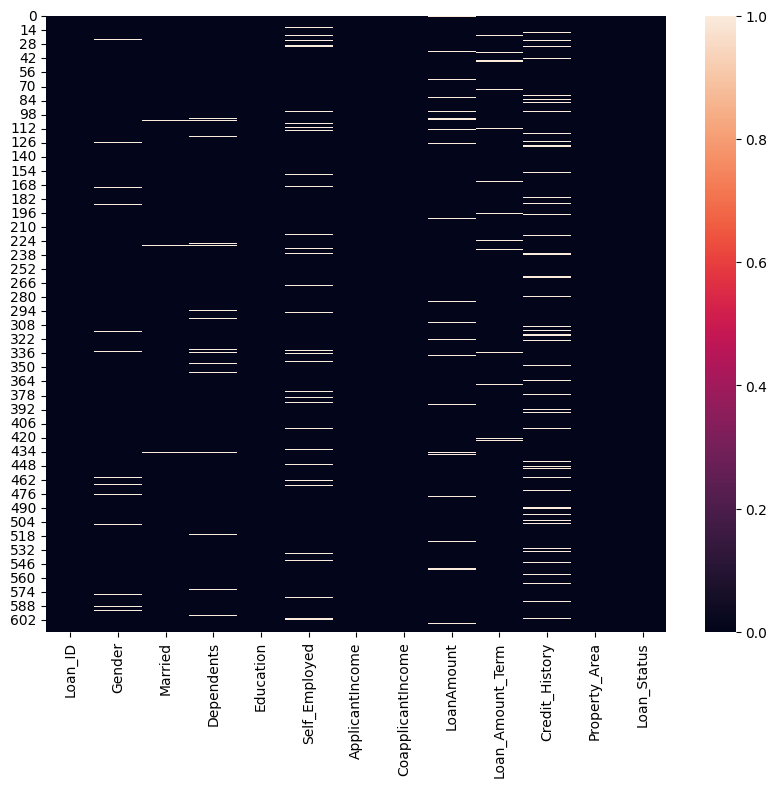

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(loan.isnull())

In [9]:
missing_values = loan.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(loan))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


- <b> Observations :</b>
    - There are missing values in 7 out of 13 columns.
    - We use mean and mode to replace the small quantity of missing data with NaN values.
   
<b> Before we look at missing value imputation, let's discuss categorical characteristics.</b>

### Start by listing Value counts and possible Sub-categories for various categorial attributes.

In [10]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(loan[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


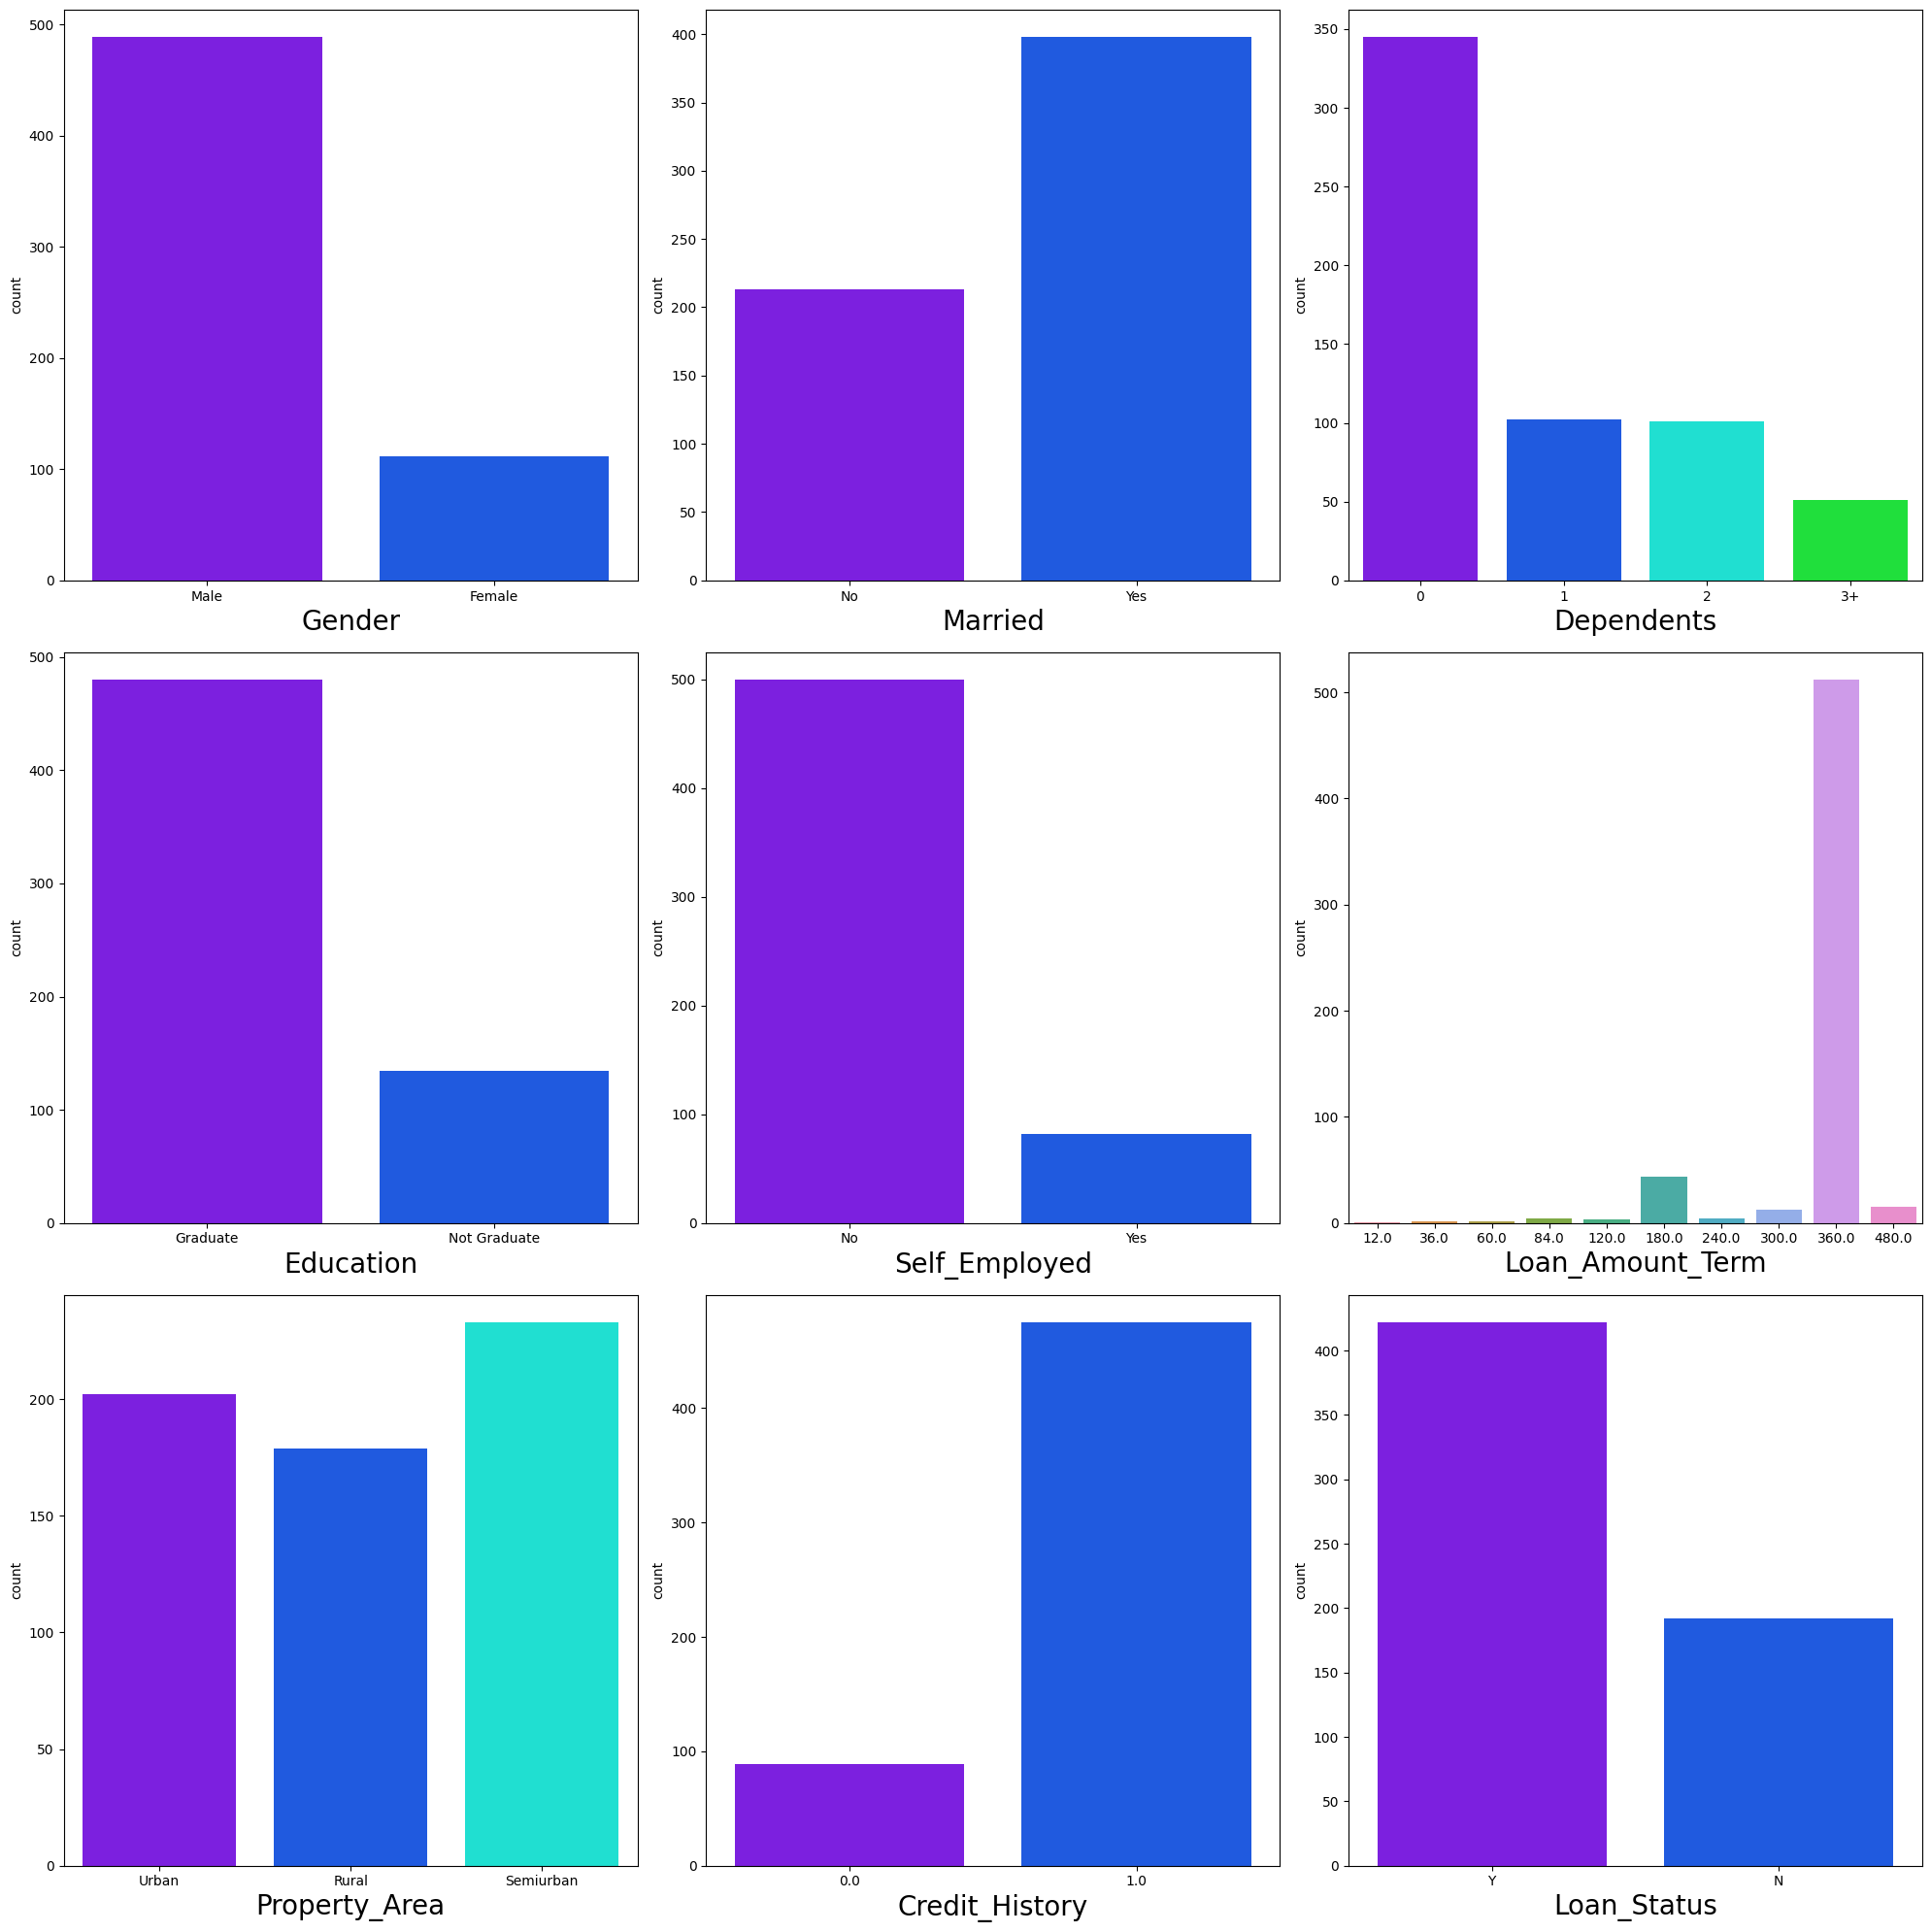

In [11]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(loan[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- <b> Observations:</b>
     - Eighty percent of all loan applicants are men. <b>We can investigate the loan amounts for each gender who applies and determine whether or not loans are approved for each gender on the same grounds.</b>
     - Among applicants, only 20% are self-employed. <b> The relationship between applicant income and loan acceptance for the non-self employed category will therefore be fascinating to learn about. In order to approve loans, we shall search for any benchmark range of income.We'll also look for a benchmark on the borrowing requirements for these two categories.</b>
     - Nearly 70% of loan applicants are married, and 75% are graduates.
     - Nearly 60% of applicants do not have any dependents.
     - Semi-urban areas are where the majority of applicants come from, followed by urban and rural areas.
     - 80% of people have some credit history. People with credit histories are typically considered as being more likely to get approved for loans.
     - Nearly 70% of loan applications are granted.
    
<b> With the mode in that category, we can impute a categorical variable. We have the choice of mean and median for numerical variables. We shall impute using the median if outliers stretch.</b>
    
### Check missing values for outliers. By using a boxplot, you can display a numerical variable that has missing values.

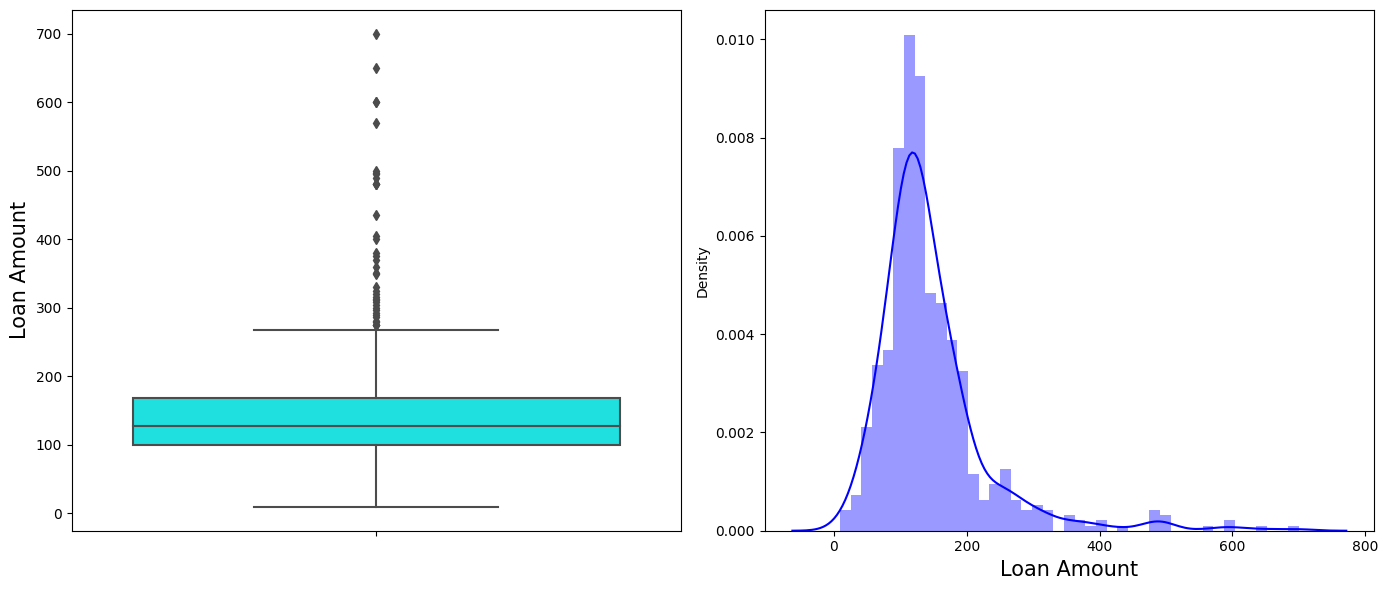

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=loan,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(loan['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
print("Mean of Loan Amount:",loan['LoanAmount'].mean())
print("Median of Loan Amount:",loan['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


#### Observations -
- The mean loan amount is higher than the median loan amount. 
- Outliers are clearly visible in the boxplot, and the feature in the distribution plot is stretched too much.

<b> We will substitute missing values in the <u>loan amount with the median because extreme outliers are present in the feature and as a result, the data is more sensitive to mean.</u> </b>

### Imputation of Missing values

### Imputation information:
1. The median value is used to impute missing values in the loan amount.
2. Since 360 months is the maximum loan term, the missing value in the loan amount term has been replaced with 360 months.
3. The respective attributes for Credit History, Self Employment, Dependents, Gender, and Married are substituted.

In [14]:
# Imputating Missing value with mode for categorical features
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)

### Missing Value Check After Imputation

In [15]:
missing_values = loan.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(loan))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


#### Observations :
<b> Finally, there is no missing value.

We are now ready to move on!</b>

### Statistical Matrix

<Axes: >

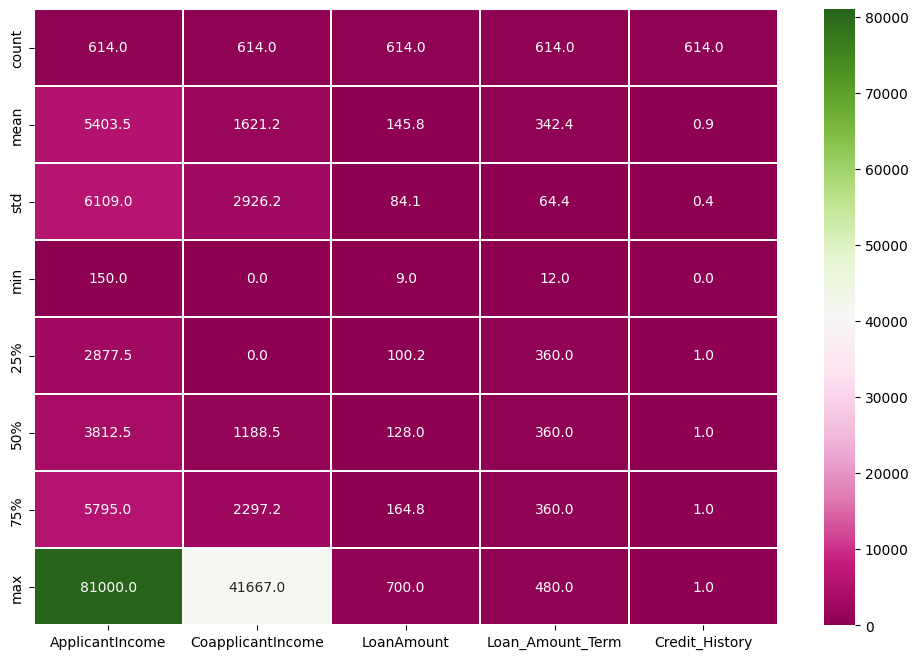

In [16]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(loan.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [17]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Observations:
- The standard deviation number for applicant and coapplicant income is higher than the median. Data is so dispersed and biased.
- With regard to 75% and Max rows, it is certain that outliers exist for Applicant Income, Coapplicant Income, and Loan Amount.
- Since Credit History is a categorical variable, none of its statistical parameters have any bearing.
- The minimum loan term is 12 months, and the maximum term is 480 months.
- The applicant's income must be at least 150 and up to 81,000.

<b> Let's explore Target and the independent feature.</b>

### Target Variable

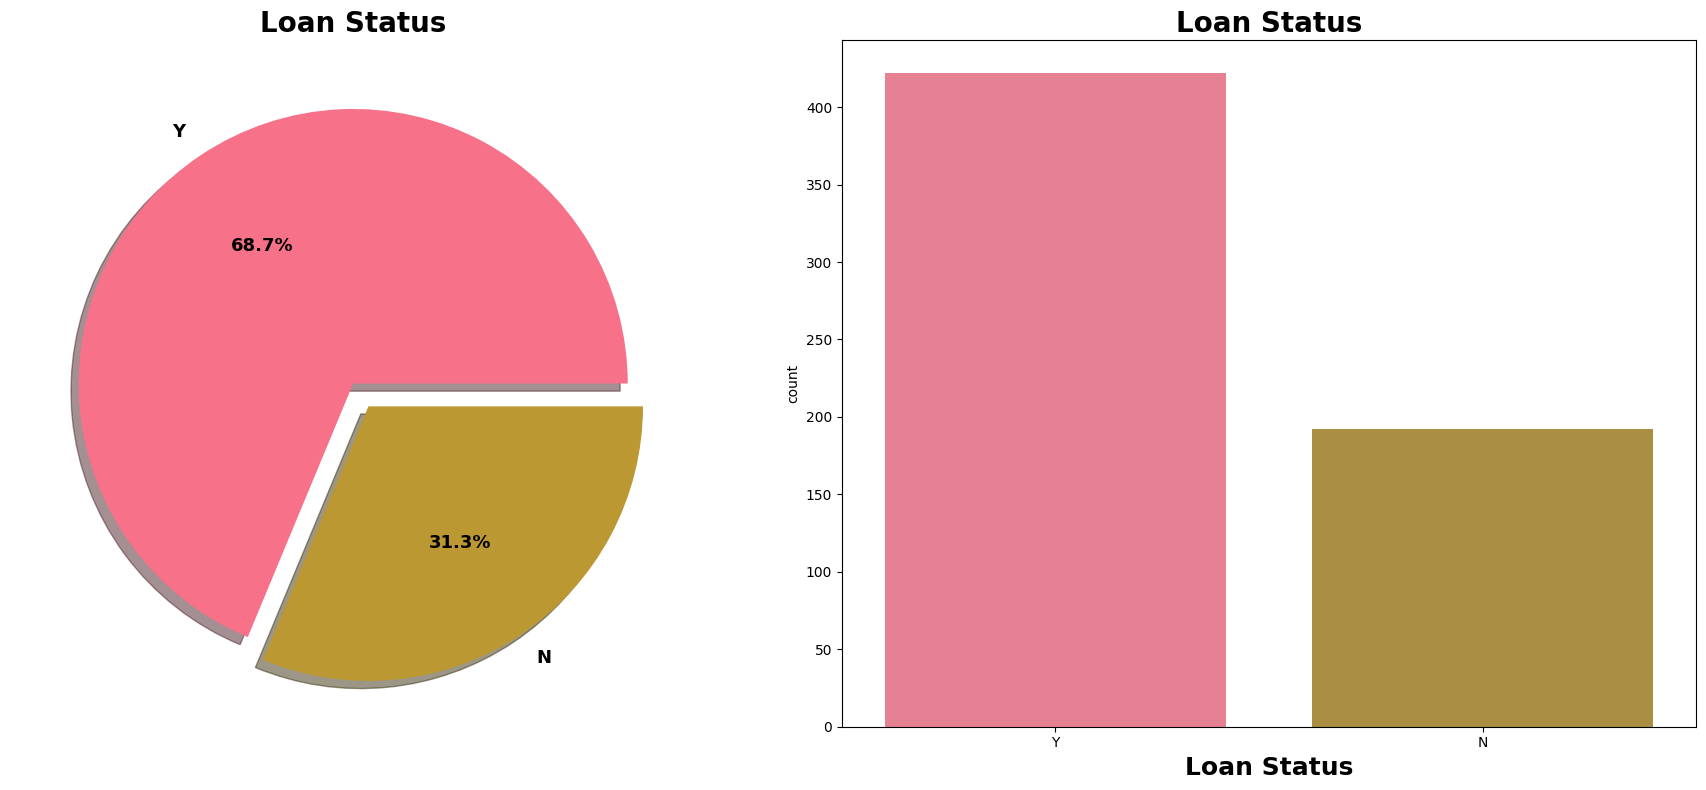

In [18]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
loan['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=loan,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

#### Observations :
- 68.7% of applicants are approved for loans.
- We can see how uneven the dataset is.


<b> Let's compare each feature to the target variable to learn more about the data. </b>

### Pie Charts and Bar Plots of Gender Vs Loan Status

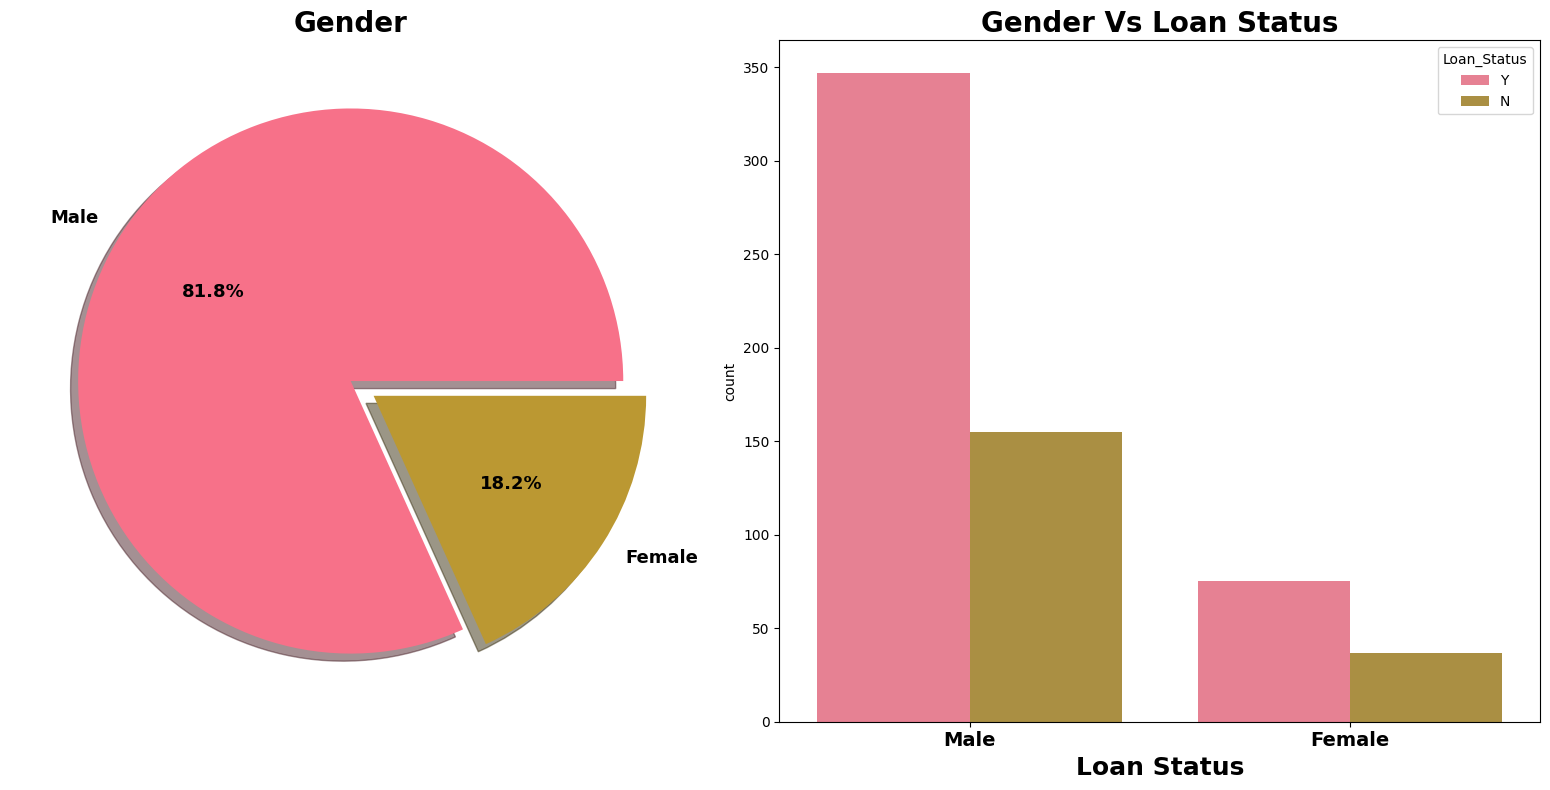

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
loan['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=loan,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [20]:
pd.crosstab(loan['Gender'],loan["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


#### Observations :
- 81.8% of the applicants are men.
- 65% of loan applications from either gender, regardless of gender, are approved.<b>This indicates that gender has no bearing on loan approval. No distinction was made based on gender or name.</b>

### Married Vs Loan Status

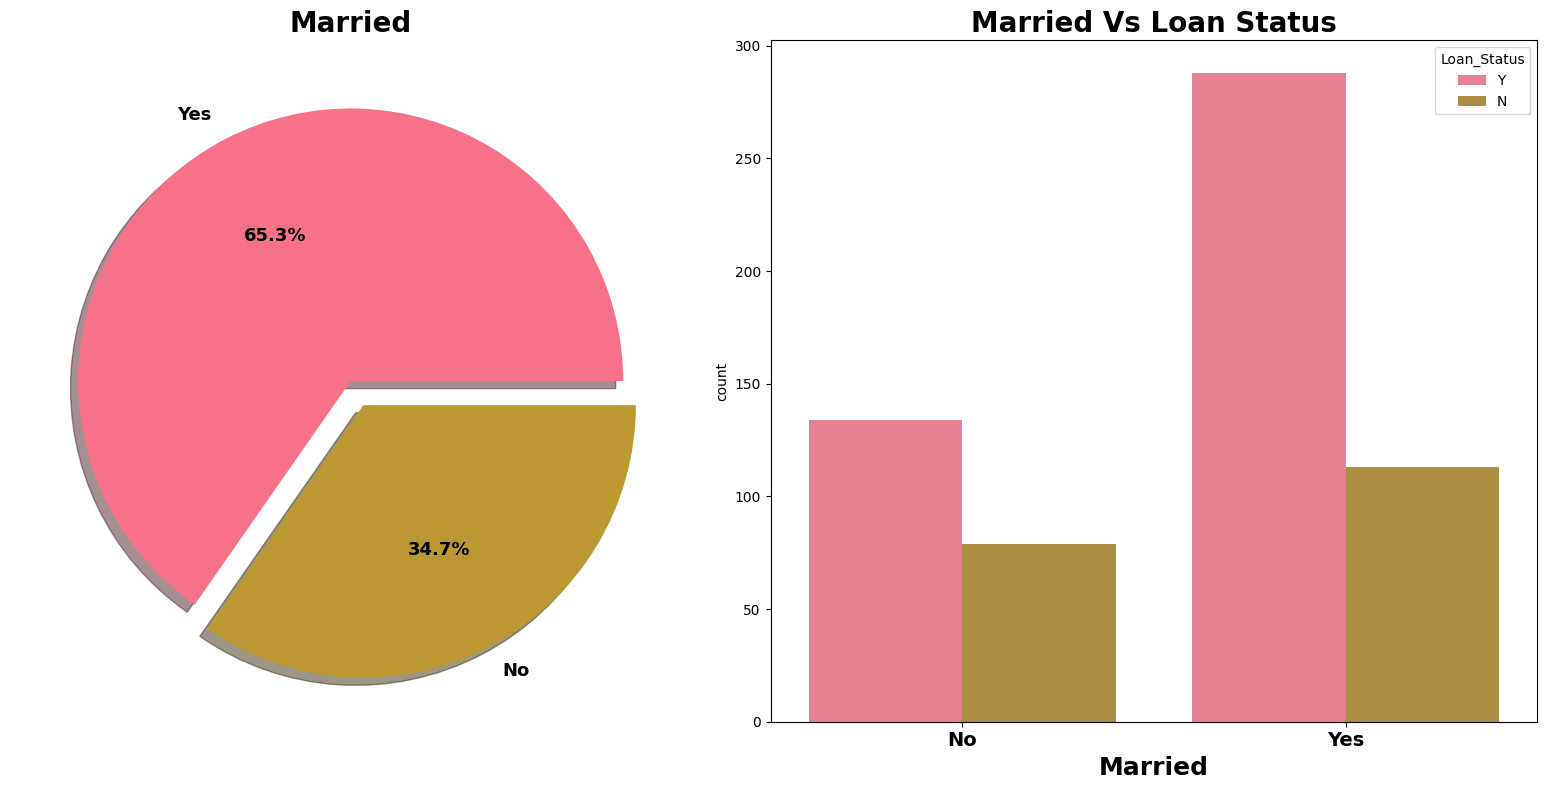

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
loan['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=loan,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [22]:
pd.crosstab([loan['Gender'],loan['Married']],[loan.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

#### Observations:
- 65.3% of those requesting loans are married. The Count plot <u> demonstrates that married persons have a higher chance of being approved for a loan.</u>
- <b> But now for the intriguing crosstab observation:</b>
    - Women who are single have a higher likelihood of being approved for a loan than those who are married.<b>We'll try to determine which factor—such as education, employment, or income—really makes a difference in this situation.</b>
    - Married men had higher approval rates for loans.
    
### Let's see how number dependencies affect this situation. 

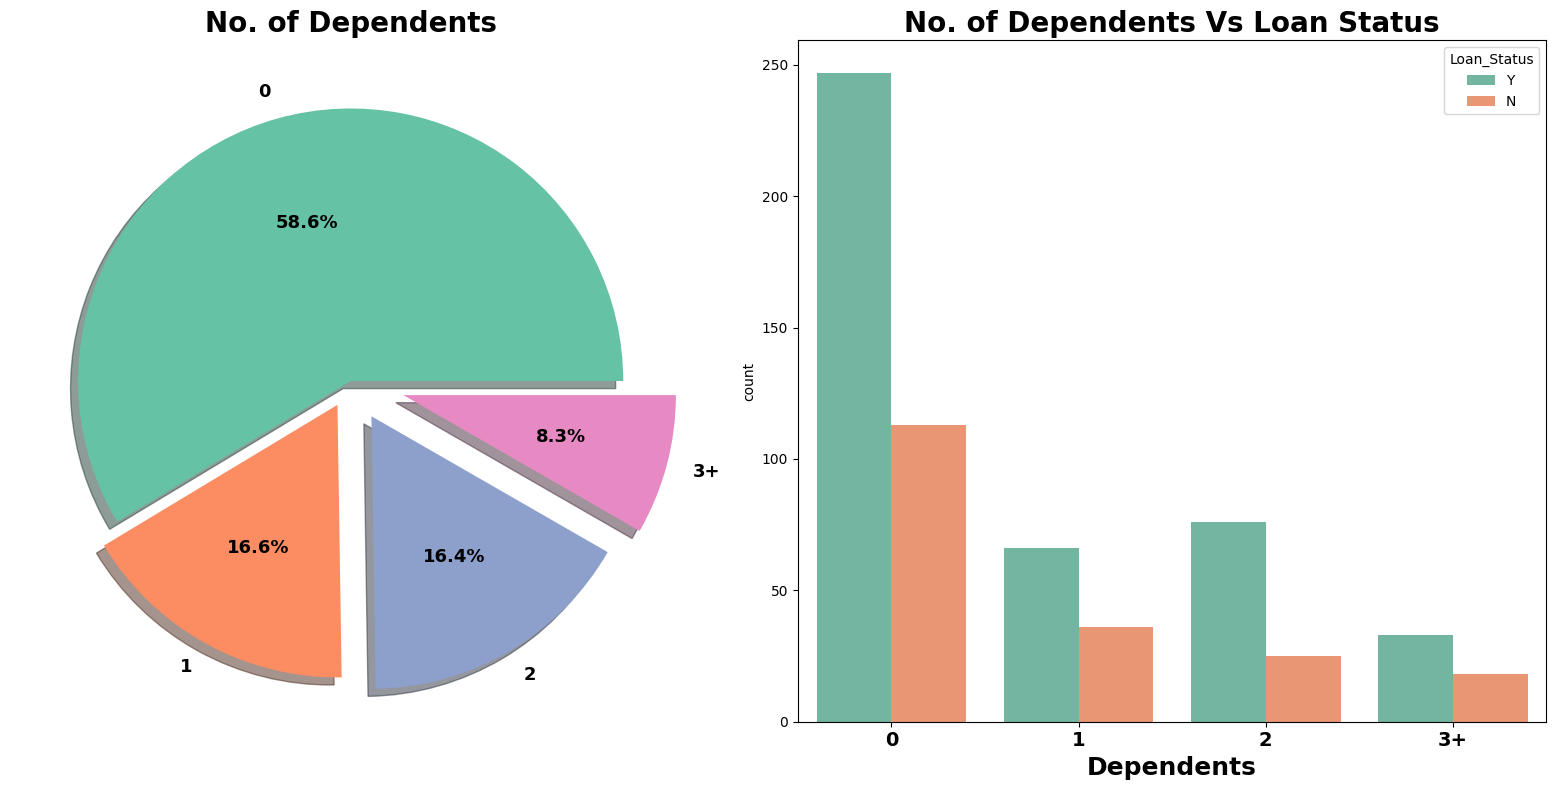

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
loan['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=loan,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [24]:
pd.crosstab([loan['Dependents']],[loan.Loan_Status,loan['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [25]:
pd.crosstab([loan['Dependents'],loan['Gender']],[loan.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Observations:
- 58.6% of applicants declare themselves to be independent.One or two dependents make up 33% of applicants.<b> It will be interesting to see if the amount of the loan required increases with the number of dependents.</b>
- Women without dependents have a higher likelihood of getting a loan approved than women who do.
- For men, the maximum number of dependents that can be financed is 0, followed by 2 dependents.

In [26]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Education Vs Loan status

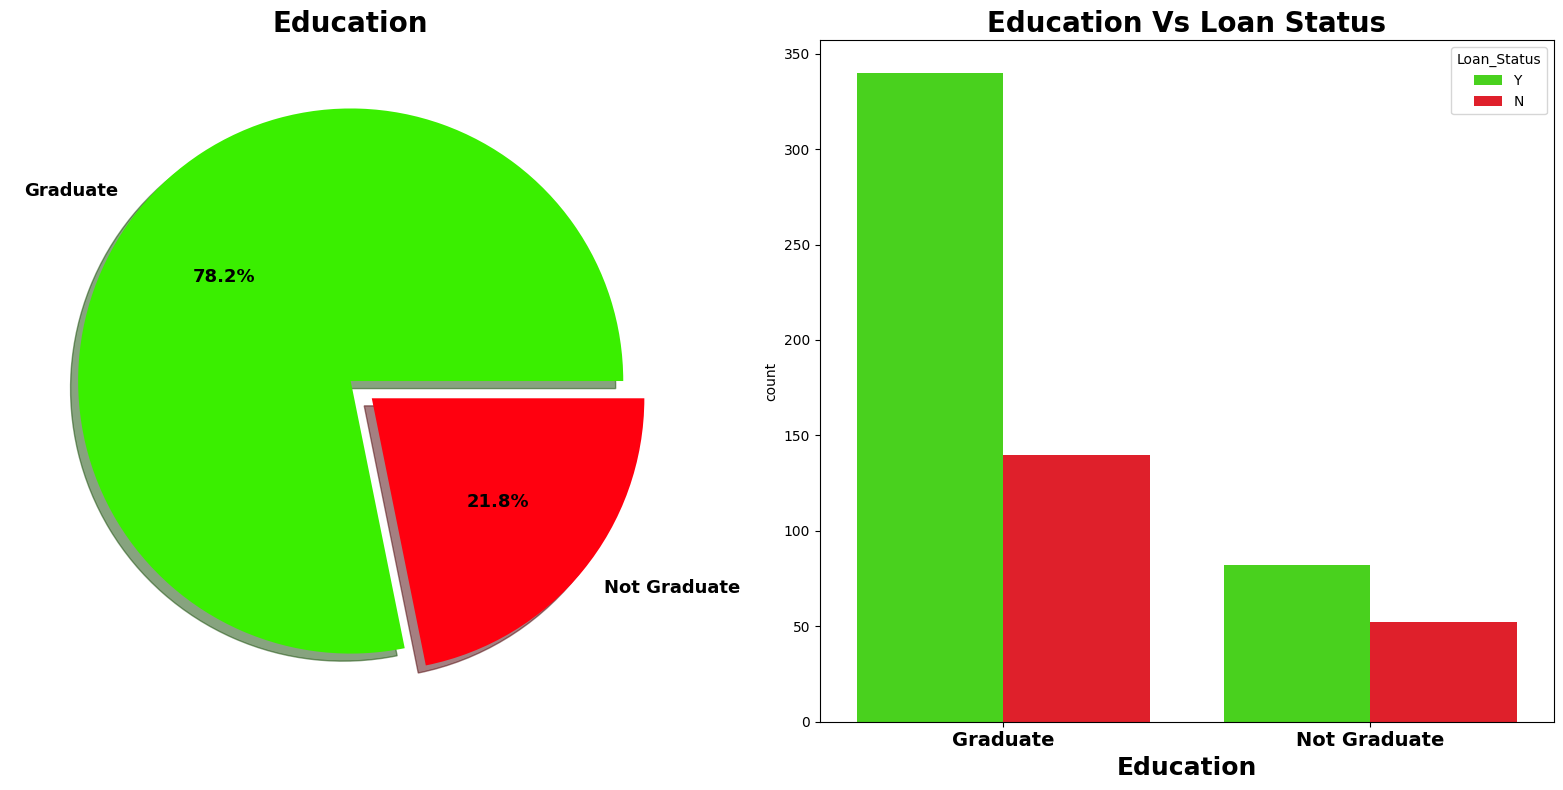

In [27]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
loan['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=loan,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [28]:
pd.crosstab([loan['Education'],loan['Gender']],[loan.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Observations:
- Graduate candidates have a higher chance of being approved for a loan, regardless of gender.

In [29]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [30]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [31]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    loan[i] = le.fit_transform(loan[i])
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [32]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

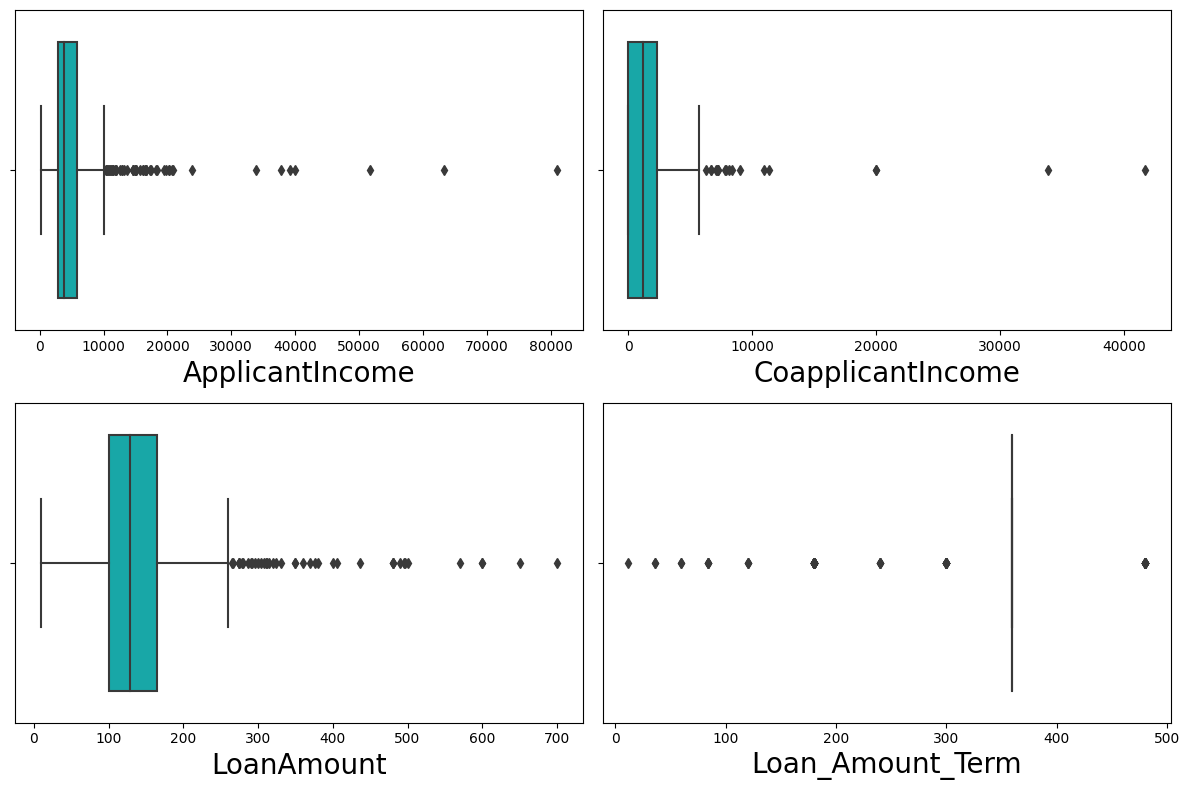

In [33]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(loan[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> Boxplot shows that the dataset contains outliers.</b>

In [34]:
# Droping unnecessary columns
loan.drop(["Loan_ID"], axis=1, inplace=True)

In [35]:
loan['Dependents'] = loan.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [36]:
loan['Dependents'] =pd.to_numeric(loan['Dependents'])

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(loan))
threshold = 3
loan1 = loan[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", loan.shape)
print ("Shape of the dataframe after removing outliers: ", loan1.shape)
print ("Percentage of data loss post outlier removal: ", (loan.shape[0]-loan1.shape[0])/loan.shape[0]*100)

loan=loan1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


##### Data Loss

In [38]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


<b><em> We are losing 6.02 % of data and which Acceptable.</em></b>

## 2.  Skewness of features

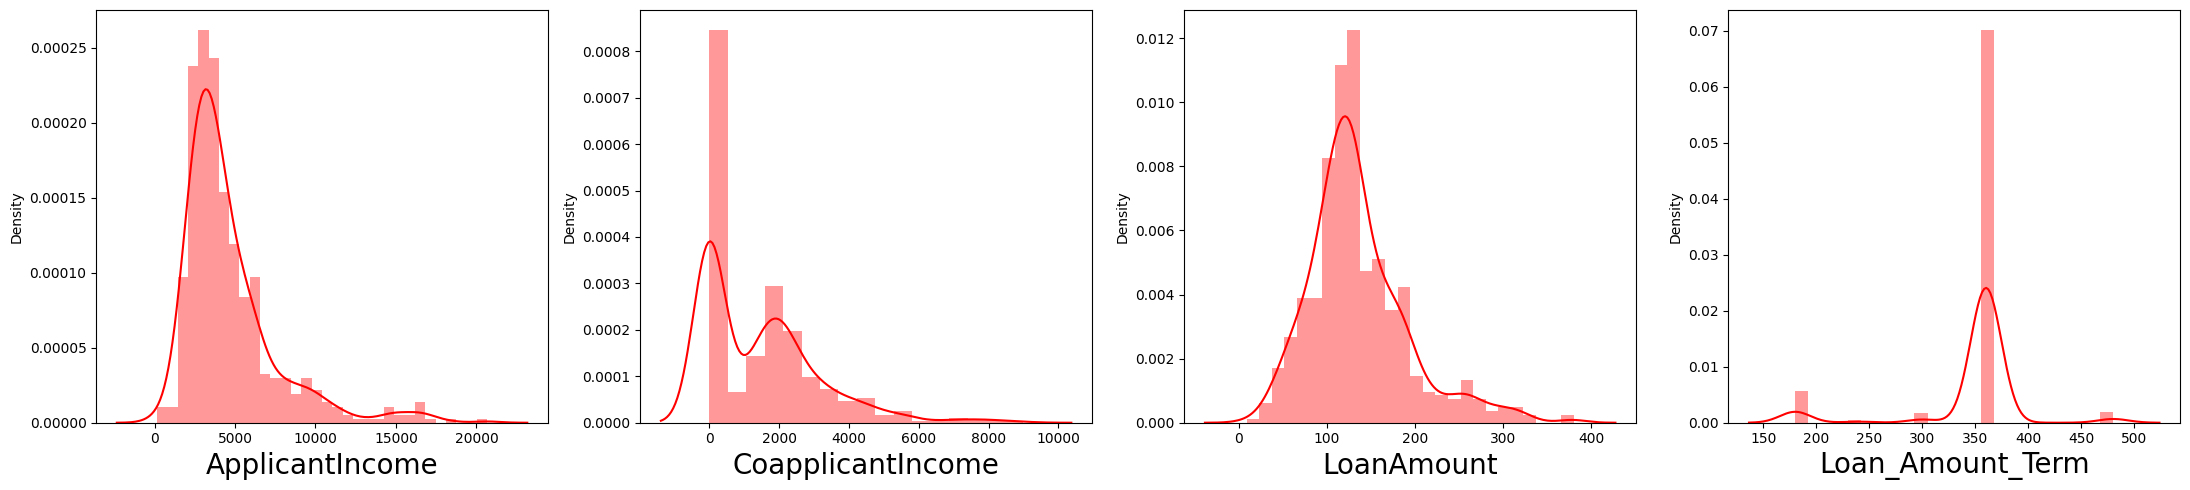

In [39]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(loan[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [40]:
loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#### Observations :
- Out of all the features mentioned above, the numerical features <b> "ApplicantIncome," "CoapplicantIncome," and "LoanAmount" </b> are skewed.
- Other features are categorical in nature; hence, skewness has nothing to do with them.<u>They won't matter to us.</u>
- We'll use the <b> Yeo-Johnson transformation technique</b>.

In [41]:
import numpy, warnings
numpy.warnings= warnings
# Using the Yeo-Johnson approach to remove skewness to improve prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
loan[skew] = scaler.fit_transform(loan[skew].values)
loan[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


####  after using the Yeo-Johnson method, checking for skewness

In [43]:
loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<b> The skewness of the numerical variable is within acceptable bounds.

So, yes, let's move forward!
</b>

## 3. Corrleation 

In [44]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


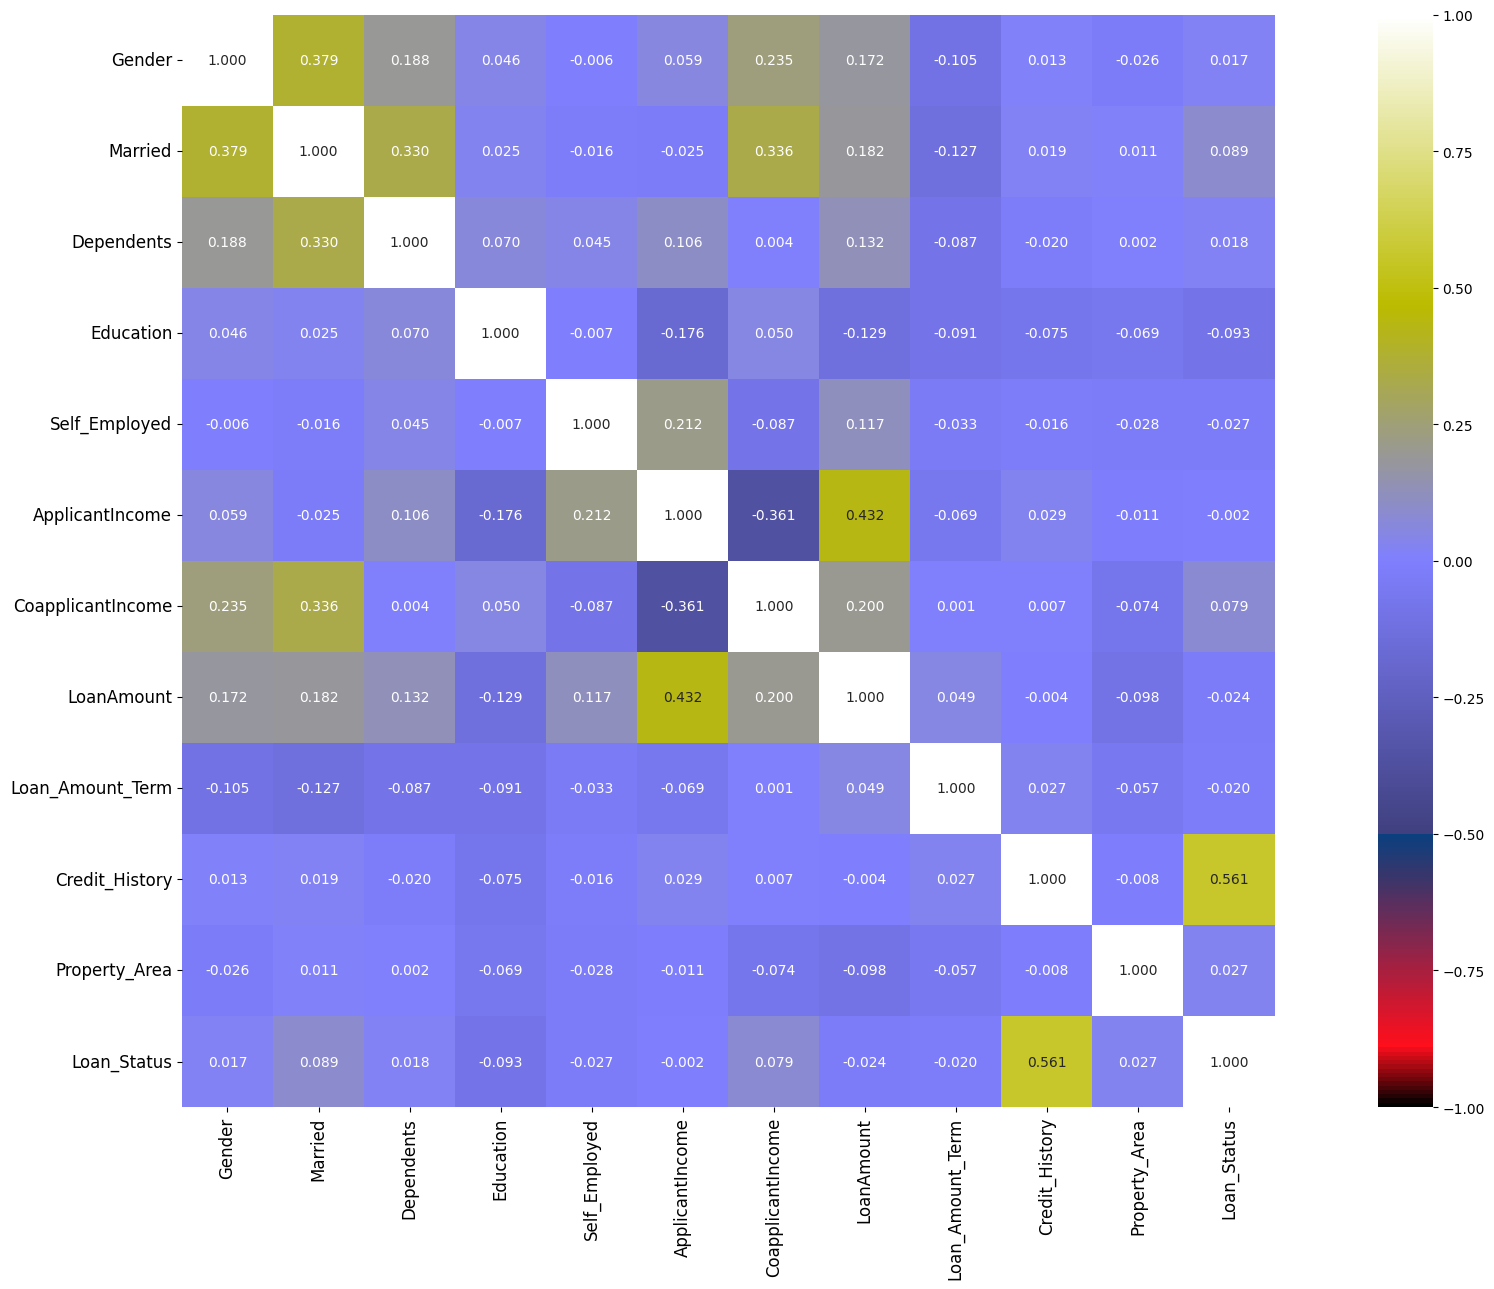

In [45]:
plt.figure(figsize=(21,13))
sns.heatmap(loan.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

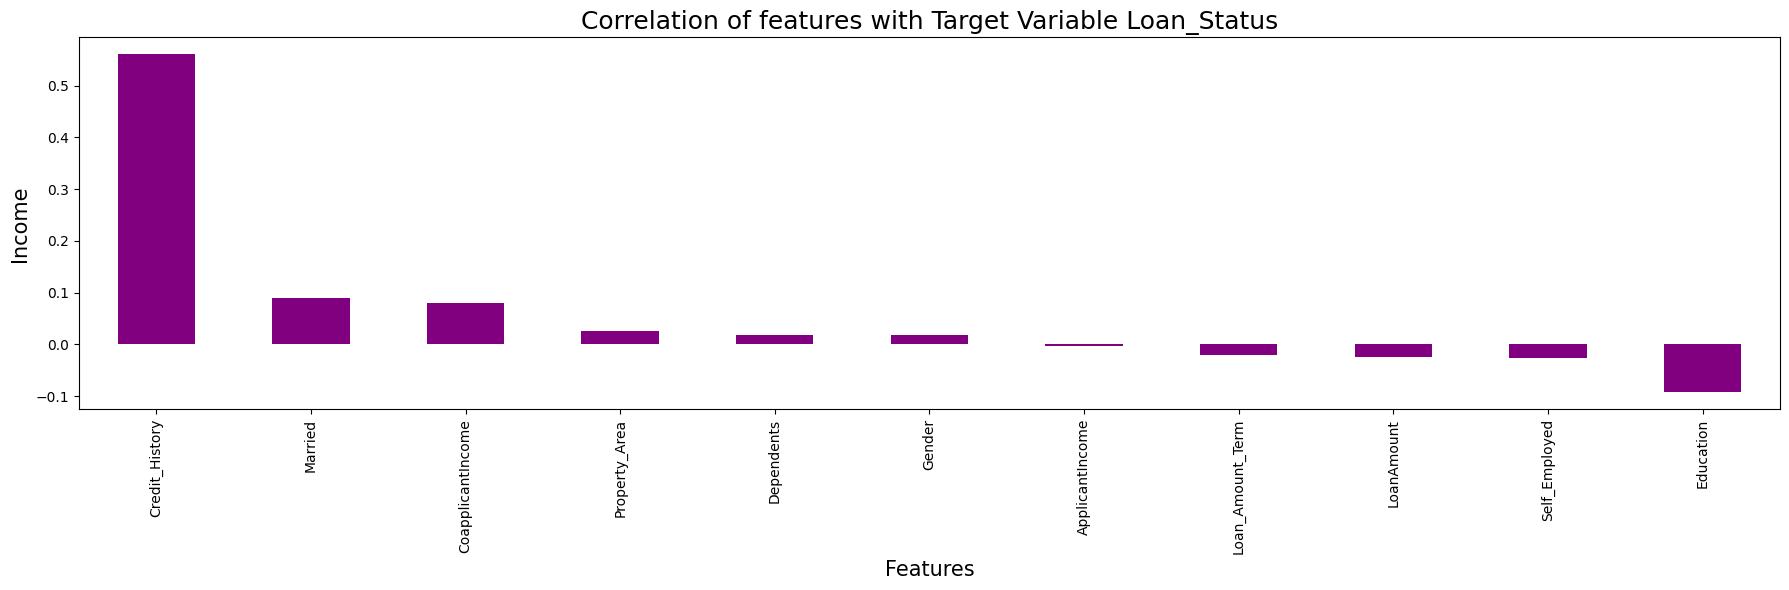

In [46]:
plt.figure(figsize = (18,6))
loan.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

#### Observation:
<b>Except for Credit History, the most of features have weak to moderate correlations with the target variable. </b>
- There is a maximum correlation of 0.561 between loan status and credit history.

 ## 4. Making use of the variance_inflation_factor to examine multicollinearity between features

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(loan.values,i) for i in range(loan.shape[1])]
vif['Features']= loan.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


<b> every feature VIF is within the permitted range of 10. 

In light of this, multicollinearity is not a concern.</b>


## 5. Bringing a target feature into balance

In [48]:
loan.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

<b> We must balance the target variable since the data it contains is unbalanced.</b>

### SMOTE-based balancing

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
# Splitting data in target and dependent feature
X = loan.drop(['Loan_Status'], axis =1)
Y = loan['Loan_Status']

In [51]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [52]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<b><em> The class unbalanced issue has been successfully rectified, and since all the categories now have the same data, the ML model is not biased toward any particular category.</em></b>

## Standard Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


### Finding best Random state

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8493723849372385 on Random_state 68


## Logistics Regression Model

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8200836820083682


Confusion matrix of Logistics Regression : 
 [[ 73  37]
 [  6 123]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       110
           1       0.77      0.95      0.85       129

    accuracy                           0.82       239
   macro avg       0.85      0.81      0.81       239
weighted avg       0.84      0.82      0.81       239



### Finding Optimal value of n_neighbors for KNN

In [58]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4883581921595791
RMSE value for k=  2 is: 0.5294664560040351
RMSE value for k=  3 is: 0.4883581921595791
RMSE value for k=  4 is: 0.5334030637818674
RMSE value for k=  5 is: 0.47971400126799746
RMSE value for k=  6 is: 0.4840553929365547
RMSE value for k=  7 is: 0.4840553929365547
RMSE value for k=  8 is: 0.4840553929365547
RMSE value for k=  9 is: 0.44345543143056887
RMSE value for k=  10 is: 0.44814821218396267
RMSE value for k=  11 is: 0.44345543143056887
RMSE value for k=  12 is: 0.43391764060527876
RMSE value for k=  13 is: 0.45738935374634826
RMSE value for k=  14 is: 0.45738935374634826
RMSE value for k=  15 is: 0.4527923591472056
RMSE value for k=  16 is: 0.44345543143056887
RMSE value for k=  17 is: 0.44814821218396267
RMSE value for k=  18 is: 0.45738935374634826
RMSE value for k=  19 is: 0.44345543143056887
RMSE value for k=  20 is: 0.4387124562248739
RMSE value for k=  21 is: 0.4527923591472056
RMSE value for k=  22 is: 0.4664474480124446
RMSE val

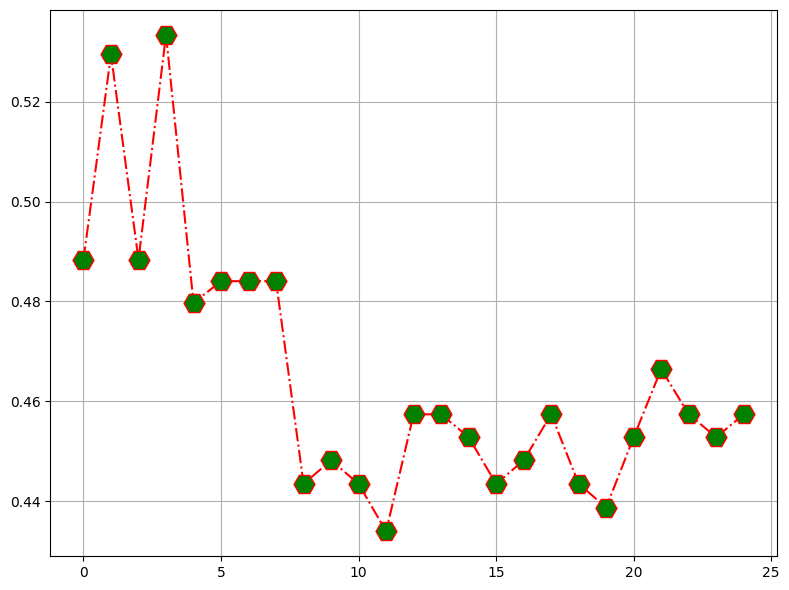

In [59]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='red', linestyle='dashdot', marker='H', markerfacecolor='green', markersize=15)
plt.grid()


#### Observations- 
The minimal RMSE value, which is around 0.44814821218396267 for k=3, increases when k is increased further. We can confidently state that k=3 will provide the best outcome in this scenario.


## other categorization algorithm application

Evaluation Matrix for Classification ML Algorithms SVC() is


Accuracy Score :
 0.7824267782426778


Confusion matrix : 
 [[ 73  37]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.66      0.74       110
           1       0.75      0.88      0.81       129

    accuracy                           0.78       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.78      0.78       239





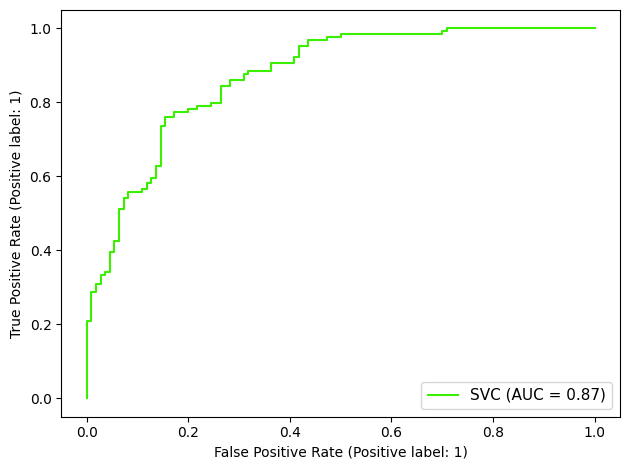

*************************************************************************************************************
Evaluation Matrix for Classification ML Algorithms GaussianNB() is


Accuracy Score :
 0.7656903765690377


Confusion matrix : 
 [[ 68  42]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.62      0.71       110
           1       0.73      0.89      0.80       129

    accuracy                           0.77       239
   macro avg       0.78      0.75      0.76       239
weighted avg       0.78      0.77      0.76       239





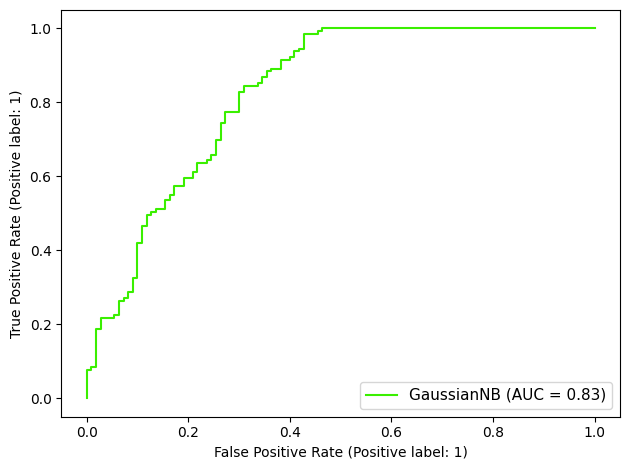

*************************************************************************************************************
Evaluation Matrix for Classification ML Algorithms DecisionTreeClassifier() is


Accuracy Score :
 0.8368200836820083


Confusion matrix : 
 [[ 94  16]
 [ 23 106]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.87      0.82      0.84       129

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239





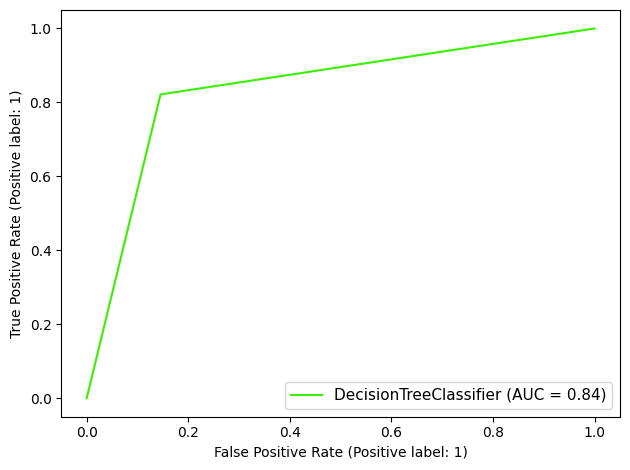

*************************************************************************************************************
Evaluation Matrix for Classification ML Algorithms KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7615062761506276


Confusion matrix : 
 [[84 26]
 [31 98]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       110
           1       0.79      0.76      0.77       129

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239





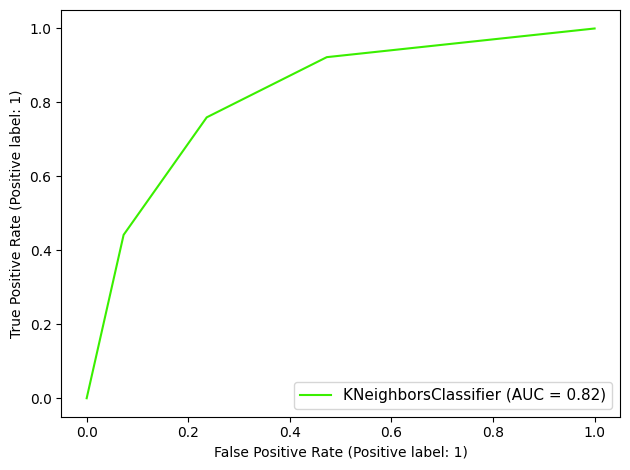

*************************************************************************************************************
Evaluation Matrix for Classification ML Algorithms RandomForestClassifier() is


Accuracy Score :
 0.8661087866108786


Confusion matrix : 
 [[ 93  17]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.87      0.88      0.88       129

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.87       239
weighted avg       0.87      0.87      0.87       239





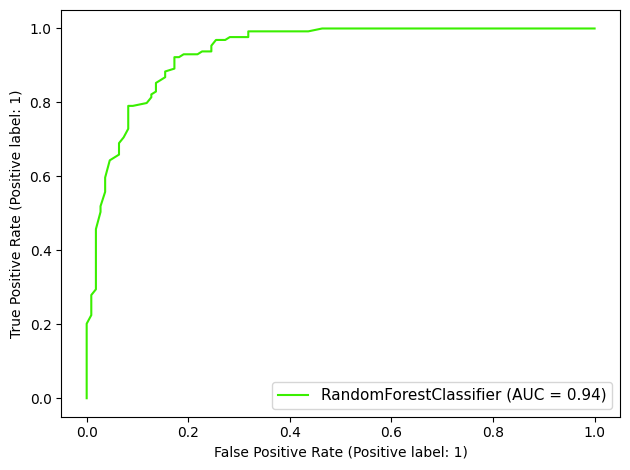

*************************************************************************************************************
Evaluation Matrix for Classification ML Algorithms ExtraTreesClassifier() is


Accuracy Score :
 0.8577405857740585


Confusion matrix : 
 [[ 92  18]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.86      0.88      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239





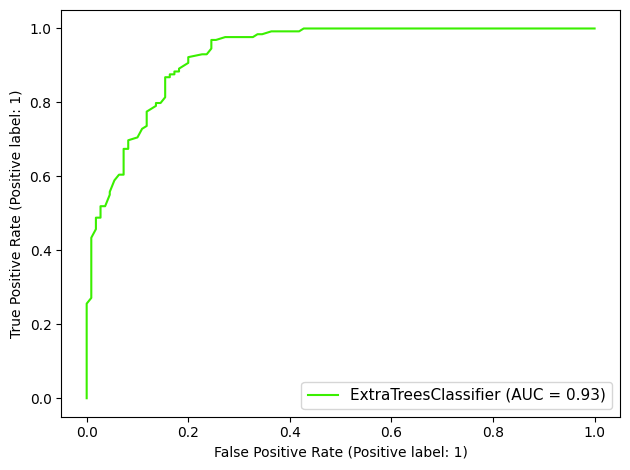

*************************************************************************************************************


In [60]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Evaluation Matrix for Classification ML Algorithms',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('*************************************************************************************************************')


# CrossValidation :

In [61]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70625    0.74213836 0.81761006 0.85534591 0.74213836]
Mean Score : 0.7726965408805031
Std deviation : 0.05501070813193422




Cross Validation Score SVC() :

Score : [0.7        0.74842767 0.77358491 0.83018868 0.78616352]
Mean Score : 0.7676729559748428
Std deviation : 0.04297691875031475




Cross Validation Score GaussianNB() :

Score : [0.6875     0.72327044 0.81132075 0.79874214 0.7672956 ]
Mean Score : 0.757625786163522
Std deviation : 0.046400700415091985




Cross Validation Score DecisionTreeClassifier() :

Score : [0.75       0.76100629 0.81761006 0.81132075 0.81132075]
Mean Score : 0.790251572327044
Std deviation : 0.028676762553906922




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.74375    0.75471698 0.68553459 0.79245283 0.79245283]
Mean Score : 0.7537814465408805
Std deviation : 0.039370268568426556




Cross Validation Score RandomForestClassifier() :

Score : [0.78125    0.82389937

#### We can see that RandomForestClassifier() provides us with the highest possible f1 score, the best cross-validation score, and good accuracy.  On the Random Forest model, we will apply Hyperparameter tuning and use it as the final model.

# Tuning for hyperparameters: GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.759 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.757 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.721 total time=   0.0s
[CV 5

[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.777 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.748 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.748 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.757 total time=   0.0s
[CV 1/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 10/168] END bootstrap=True, criterion=gini, max_de

[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.741 total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.784 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.739 total time=   0.0s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.793 total time=   0.0s
[CV 1/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 1/5; 17/168] END bootstrap=True, criteri

[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.741 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.766 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 24/168] END bootstrap=True, criteri

[CV 2/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.777 total time=   0.0s
[CV 3/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 3/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.811 total time=   0.0s
[CV 4/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 4/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.766 total time=   0.0s
[CV 5/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.712 total time=   0.0s
[CV 1/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 31/168] END bootstrap=True, criteri

[CV 2/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.830 total time=   0.0s
[CV 3/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.757 total time=   0.0s
[CV 4/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 5/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.784 total time=   0.0s
[CV 1/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 38/168] END bootstrap=True, criteri

[CV 3/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.793 total time=   0.0s
[CV 4/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 4/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.766 total time=   0.0s
[CV 5/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.775 total time=   0.0s
[CV 1/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.759 total time=   0.0s
[CV 2/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 45/168] END bootstrap=True, criteri

[CV 2/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.768 total time=   0.0s
[CV 3/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 3/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.802 total time=   0.0s
[CV 4/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 4/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 5/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 5/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.802 total time=   0.0s
[CV 1/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END bootstrap=True, criteri

[CV 2/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.821 total time=   0.0s
[CV 3/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 3/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.820 total time=   0.0s
[CV 4/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 4/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.775 total time=   0.0s
[CV 5/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 5/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.829 total time=   0.0s
[CV 1/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 1/5; 60/168] END bootstrap=True, criteri

[CV 5/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.838 total time=   0.0s
[CV 1/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 1/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 2/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 2/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 3/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.856 total time=   0.0s
[CV 4/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 67/168] END bootstrap=True, criteri

[CV 1/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.741 total time=   0.0s
[CV 2/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 2/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.820 total time=   0.0s
[CV 4/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 74/168] END bootstrap=True, criteri

[CV 2/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.777 total time=   0.0s
[CV 3/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 3/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.838 total time=   0.0s
[CV 4/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 5/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.820 total time=   0.0s
[CV 1/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 82/168] END bootstrap=True, criteri

[CV 3/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 4/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.748 total time=   0.0s
[CV 5/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 5/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 1/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 1/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.741 total time=   0.1s
[CV 2/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 2/5; 89/168] END bootstr

[CV 3/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 4/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 4/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.730 total time=   0.0s
[CV 5/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 5/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 1/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 1/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.723 total time=   0.1s
[CV 2/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 2/5; 96/168] END bootstr

[CV 2/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.804 total time=   0.0s
[CV 3/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 3/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 4/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 5/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 1/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 1/5; 103

[CV 2/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 3/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.820 total time=   0.0s
[CV 4/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 4/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 5/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 1/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 110

[CV 2/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 3/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 3/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.820 total time=   0.0s
[CV 4/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 4/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.838 total time=   0.0s
[CV 1/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 1/5; 117

[CV 2/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.777 total time=   0.0s
[CV 3/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 3/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 4/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 5/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 5/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 1/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 1/5; 124

[CV 2/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.768 total time=   0.0s
[CV 3/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 3/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 4/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.820 total time=   0.0s
[CV 5/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 1/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 1/5; 131

[CV 2/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.821 total time=   0.0s
[CV 3/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 4/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 5/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 1/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 1/5; 138

[CV 2/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.804 total time=   0.0s
[CV 3/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 4/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 5/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.757 total time=   0.0s
[CV 1/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 1/5; 145

[CV 1/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 2/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 2/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 151

[CV 2/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.741 total time=   0.0s
[CV 3/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.838 total time=   0.0s
[CV 5/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.757 total time=   0.0s
[CV 1/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 159

[CV 2/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 3/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 1/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 166

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [65]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [66]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=25 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8702928870292888


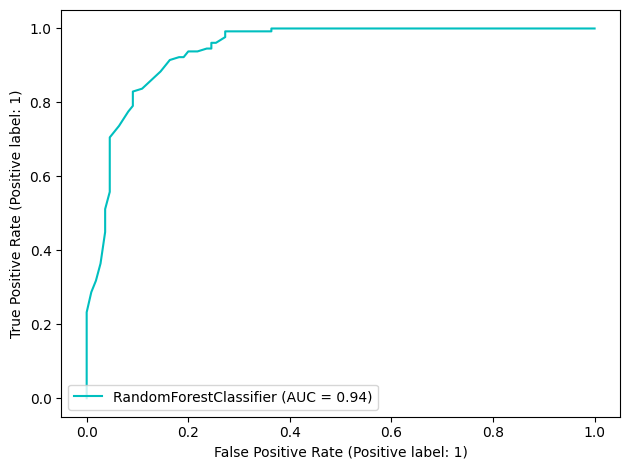

<Figure size 2000x1600 with 0 Axes>

Area Under the Curve score.(AUC):
 0.8657857646229739


In [67]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test,color='c')   
plt.legend(prop={'size':10}, loc='lower left')
plt.figure(figsize=(20,16))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Area Under the Curve score.(AUC):'+'\033[0m\n',auc_score)

## Saving model

In [68]:
import joblib
joblib.dump(Final_mod,'Evaluation_Loan_Status_Final.pkl')

['Evaluation_Loan_Status_Final.pkl']